In [134]:
#import dependency
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import requests

import psycopg2


In [135]:
! pip install config

# Connect to MongoDB using pandas


## Step 1: Data Exploration


* Check the dataset
* check the missing values and duplicates
* check the columns
* check the types
* check the shape

In [136]:

# Import our input dataset
airbnb_df = pd.read_csv('Resources/airbnb_cleansed_df.csv')
airbnb_df.head(10)

,_id,id,listing_url,host_response_rate,host_acceptance_rate,host_picture_url,street,neighbourhood_cleansed,latitude,longtitude,...,pool,hair_dryer,gym,wheelchair_accessible,iron,shampoo,hangers,first_aid_kit,elevator,comments
0,60f9849930e6339dfd92b1b8,13624476,https://www.airbnb.com/rooms/13624476,100,100,https://a2.muscache.com/im/pictures/85546a19-c...,"Commercial Street, Boston, MA 02109, United St...",North End,42.366226,-71.052250,...,0,0,0,0,0,0,0,0,0,NaN
1,60f9849930e6339dfd92b1a7,1692573,https://www.airbnb.com/rooms/1692573,100,100,https://a2.muscache.com/im/users/8814724/profi...,"Greenough Avenue, Boston, MA 02130, United States",Jamaica Plain,42.313379,-71.117189,...,0,0,0,0,0,1,0,0,0,My sister and I ( 30) stayed with our elderly ...
2,60f9849930e6339dfd92b1c4,14873100,https://www.airbnb.com/rooms/14873100,92,100,https://a0.muscache.com/im/users/26098645/prof...,"Dexter Street, Boston, MA 02127, United States",South Boston,42.331079,-71.056957,...,0,0,0,0,0,1,1,0,0,NaN
3,60f9849930e6339dfd92b1cb,5867761,https://www.airbnb.com/rooms/5867761,0,0,https://a2.muscache.com/im/pictures/f3de98b7-f...,"Union Park Street, Boston, MA 02118, United St...",South End,42.343106,-71.068970,...,0,0,0,0,0,0,0,0,0,NaN
4,60f9849930e6339dfd92b1da,1321422,https://www.airbnb.com/rooms/1321422,100,100,https://a2.muscache.com/im/users/6608084/profi...,"Savin Hill Avenue, Dorchester, MA 02125, Unite...",Dorchester,42.308380,-71.046943,...,0,0,0,0,0,1,0,1,0,Barney met U.S. and showed us around the entir...
5,60f9849930e6339dfd92b1e2,7225201,https://www.airbnb.com/rooms/7225201,100,82,https://a1.muscache.com/im/users/845174/profil...,"A St, Boston, MA 02210, United States",South Boston Waterfront,42.347880,-71.049656,...,0,0,1,0,0,1,0,0,1,"Great host, comfortable bed, location is perfect"
6,60f9849930e6339dfd92b1f5,3353,https://www.airbnb.com/rooms/3353,90,78,https://a2.muscache.com/im/users/4240/profile_...,"Gardner St, Allston, MA 02134, United States",Allston,42.355017,-71.127590,...,0,0,0,0,0,0,0,0,0,"Stay exceeded my expectations. Great location,..."
7,60f9849930e6339dfd92b201,31796,https://www.airbnb.com/rooms/31796,100,100,https://a2.muscache.com/im/users/119019/profil...,"Park St, Dorchester, MA 02122, United States",Dorchester,42.299773,-71.060476,...,0,0,0,0,0,1,0,1,0,Listing erred in that on site parking is in qu...
8,60f9849930e6339dfd92b20d,197972,https://www.airbnb.com/rooms/197972,100,100,https://a2.muscache.com/im/users/965697/profil...,"Spring Park Ave, Boston, MA 02130, United States",Jamaica Plain,42.317321,-71.108338,...,0,1,0,0,1,1,1,1,0,"Excelente ,todo bien ,a pesar de la distancia ..."
9,60f9849930e6339dfd92b230,629814,https://www.airbnb.com/rooms/629814,100,92,https://a0.muscache.com/im/users/3129367/profi...,"Marbury Terrace, Boston, MA 02130, United States",Jamaica Plain,42.316866,-71.102544,...,0,1,1,0,1,1,1,1,0,My adult daughter and I just spent a week in t...


In [137]:
airbnb_df.dtypes

_id                        object
id                          int64
listing_url                object
host_response_rate          int64
host_acceptance_rate        int64
host_picture_url           object
street                     object
neighbourhood_cleansed     object
latitude                  float64
longtitude                float64
property_type              object
room_type                  object
accomodates                 int64
bathrooms                 float64
bedrooms                    int64
beds                        int64
bed_type                   object
price                       int64
security_deposit            int64
cleaning_fee                int64
extra_people                int64
number_of_reviews           int64
review_scores_rating        int64
cancellation_policy        object
wireless_internet           int64
smoke_detector              int64
air_conditioning            int64
heating                     int64
cable_tv                    int64
washer        

In [138]:
print(airbnb_df.columns)


Index(['_id', 'id', 'listing_url', 'host_response_rate',
       'host_acceptance_rate', 'host_picture_url', 'street',
       'neighbourhood_cleansed', 'latitude', 'longtitude', 'property_type',
       'room_type', 'accomodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'price', 'security_deposit', 'cleaning_fee', 'extra_people',
       'number_of_reviews', 'review_scores_rating', 'cancellation_policy',
       'wireless_internet', 'smoke_detector', 'air_conditioning', 'heating',
       'cable_tv', 'washer', 'dryer', 'family_kid_friendly', 'kitchen',
       'free_parking', 'carbon_monoxide', 'pets_allowed', 'essentials',
       'checkin_24hr', 'lock_on_bedroom_door', 'pool', 'hair_dryer', 'gym',
       'wheelchair_accessible', 'iron', 'shampoo', 'hangers', 'first_aid_kit',
       'elevator', 'comments'],
      dtype='object')


#### Data Explorarion Summary:



* There are multiple types of features, both categorical and numerical
* Tratget is numerical


## Step 2: Feature Selection:

* Use heatmap to identify features that are most correlated to the Price


<AxesSubplot:>

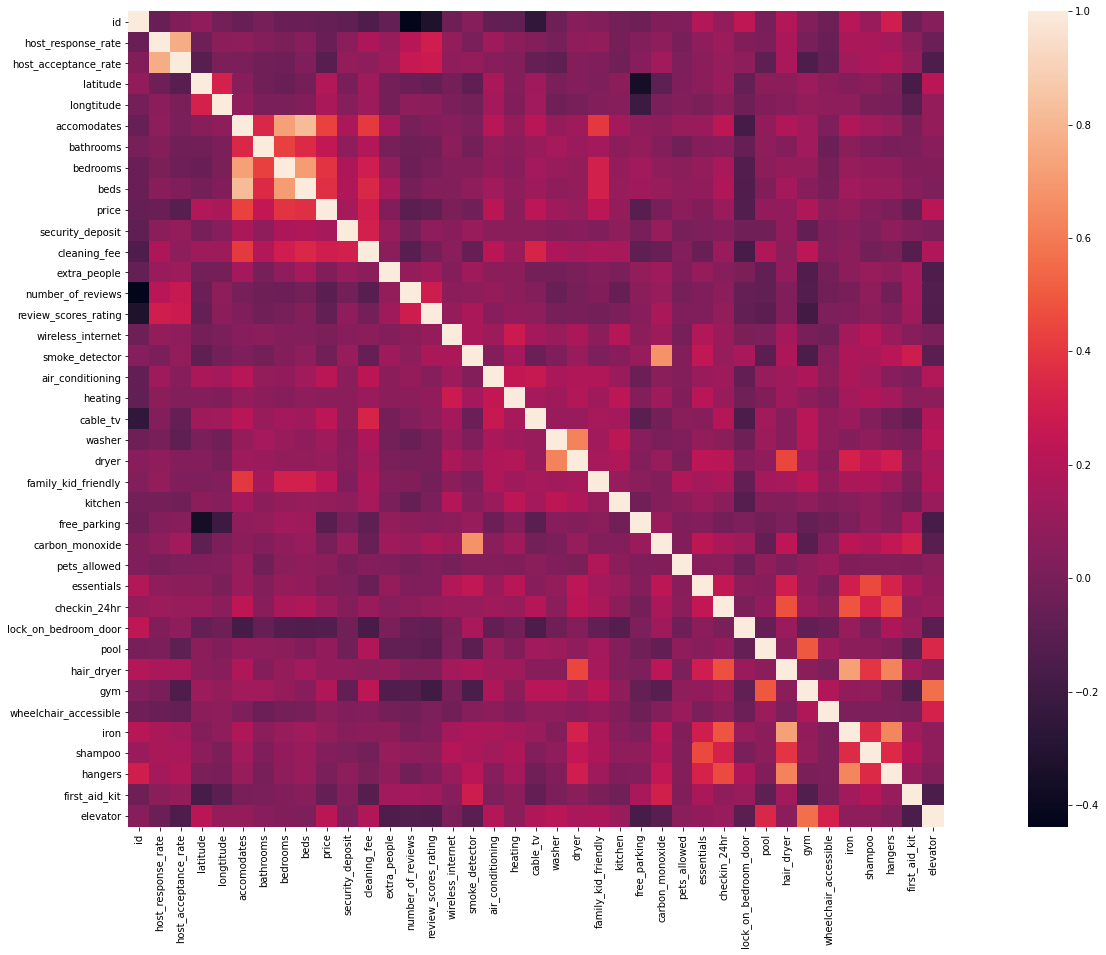

In [139]:
corrmat = airbnb_df.corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corrmat, vmax=1, square=True)

In [140]:
df_corr = airbnb_df.corr()

In [141]:
df_corr = df_corr.rename_axis(None).rename_axis(None, axis=1)
df_corr

,id,host_response_rate,host_acceptance_rate,latitude,longtitude,accomodates,bathrooms,bedrooms,beds,price,...,lock_on_bedroom_door,pool,hair_dryer,gym,wheelchair_accessible,iron,shampoo,hangers,first_aid_kit,elevator
id,1.000000,-0.046041,0.032548,0.089842,-0.010871,-0.050574,-0.004476,-0.049581,-0.046199,-0.059198,...,0.241206,0.002085,0.191445,0.036582,-0.038687,0.212156,0.115823,0.299509,-0.034668,0.050567
host_response_rate,-0.046041,1.000000,0.765951,-0.033066,0.063412,0.078182,0.040202,0.014569,0.053758,-0.046772,...,0.032188,0.005796,0.167285,0.000241,-0.047734,0.163932,0.171433,0.143949,0.057341,-0.039385
host_acceptance_rate,0.032548,0.765951,1.000000,-0.102430,0.016981,0.006819,-0.022484,-0.030428,0.027706,-0.105642,...,0.074531,-0.084579,0.161455,-0.145214,-0.058032,0.139310,0.161567,0.183075,0.095217,-0.141946
latitude,0.089842,-0.033066,-0.102430,1.000000,0.319327,0.053818,-0.017490,-0.046416,-0.010243,0.196270,...,-0.062016,0.061981,0.062710,0.122413,0.063526,0.043470,0.063825,0.014756,-0.165799,0.220872
longtitude,-0.010871,0.063412,0.016981,0.319327,1.000000,0.083658,0.008591,0.014763,0.033054,0.165621,...,-0.034234,0.028391,0.049029,0.090049,0.075355,0.076639,0.014396,0.005581,-0.097962,0.097699
accomodates,-0.050574,0.078182,0.006819,0.053818,0.083658,1.000000,0.346950,0.724401,0.815186,0.437756,...,-0.176659,0.089158,0.186705,0.137461,0.021197,0.187452,0.138336,0.105385,0.004847,0.096345
bathrooms,-0.004476,0.040202,-0.022484,-0.017490,0.008591,0.346950,1.000000,0.428332,0.351544,0.248695,...,-0.058238,0.076855,0.042144,0.137854,-0.041818,0.057927,0.024646,0.000556,0.007795,0.054995
bedrooms,-0.049581,0.014569,-0.030428,-0.046416,0.014763,0.724401,0.428332,1.000000,0.709336,0.382418,...,-0.123998,0.065518,0.098918,0.098928,-0.006244,0.104631,0.087475,0.083190,0.033705,0.031817
beds,-0.046199,0.053758,0.027706,-0.010243,0.033054,0.815186,0.351544,0.709336,1.000000,0.371407,...,-0.134696,0.032250,0.146041,0.052736,-0.002135,0.138197,0.115341,0.111298,0.052343,0.022385
price,-0.059198,-0.046772,-0.105642,0.196270,0.165621,0.437756,0.248695,0.382418,0.371407,1.000000,...,-0.131305,0.088422,0.084464,0.184463,0.060911,0.094305,0.042783,0.009880,-0.060284,0.221503


In [142]:
corrmat_2 = corrmat['price'].sort_values(ascending=False).head(12).to_frame()

cm = sns.light_palette("purple", as_cmap=True)

corrmat_3 = corrmat_2.style.background_gradient(cmap=cm)
corrmat_3

,price
price,1.000000
accomodates,0.437756
bedrooms,0.382418
beds,0.371407
cleaning_fee,0.299320
bathrooms,0.248695
cable_tv,0.226981
family_kid_friendly,0.226539
elevator,0.221503
air_conditioning,0.220434


# **Initial Features Selection**
we selected 5 features.

***NUmerical Category:**
Based on heatmap, pick the top 9 features that are most correlated to sales price. We also added another additional features: 

* accomodates
* bedrooms	
* beds
* cleaning_fee	
* bathrooms	
* cable_tv
* family_kid_friendly
* elevator
* air_conditioning

***Categorical Category:***
Categorical object can not be compared using heatmap so we selected a few more features based on commonsense
* neighbourhood_cleansed
* street
* bed_type
* room_type

# **Step 3: Data cleaning:**
* remove null value or replace it with the mode of their respective columns
* remove duplicate if any
* check histogram and see if they are normally distributed in order to be used in linear regression model
* transform the skewed numeric features by taking log(feature + 1) -->make features more normally distributed
* create new feature to combine features that are in the same category* *
* transform categorical features using Encode Labels

Note: some date cleaning has been done using SQL. (please refer to the SQL script. (ex. washer NA have been replaced with 0 to mean No washer) 

In [143]:
#Drop the _id, id and listing_url "host_picture_url" ,"latitude" ,"longtitude", "comments" column since it doesn't help with prediction
airbnb_df.drop(columns=["_id", "id" , "listing_url", "host_picture_url" ,"latitude" ,"longtitude", "comments" ], axis=1, inplace=True)
airbnb_df.head(5)

,host_response_rate,host_acceptance_rate,street,neighbourhood_cleansed,property_type,room_type,accomodates,bathrooms,bedrooms,beds,...,lock_on_bedroom_door,pool,hair_dryer,gym,wheelchair_accessible,iron,shampoo,hangers,first_aid_kit,elevator
0,100,100,"Commercial Street, Boston, MA 02109, United St...",North End,Condominium,Entire home/apt,1,1.0,1,2,...,0,0,0,0,0,0,0,0,0,0
1,100,100,"Greenough Avenue, Boston, MA 02130, United States",Jamaica Plain,House,Entire home/apt,4,1.0,2,3,...,0,0,0,0,0,0,1,0,0,0
2,92,100,"Dexter Street, Boston, MA 02127, United States",South Boston,House,Private room,2,1.0,1,1,...,0,0,0,0,0,0,1,1,0,0
3,0,0,"Union Park Street, Boston, MA 02118, United St...",South End,Apartment,Private room,1,1.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,100,100,"Savin Hill Avenue, Dorchester, MA 02125, Unite...",Dorchester,House,Private room,3,1.0,1,1,...,0,0,0,0,0,0,1,0,1,0


### check if target is normally distributed



C:\Users\Raissa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


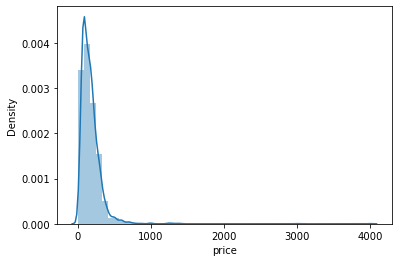

In [144]:
# check if price is normally distributed in order to be used in our Multiple linear regression model later
sns.distplot(airbnb_df['price']);
#we can see the saleprice is right skewed

# transform the the price by taking log to make the data more normally distribute
airbnb_df['price'] = np.log1p(airbnb_df['price'])

C:\Users\Raissa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


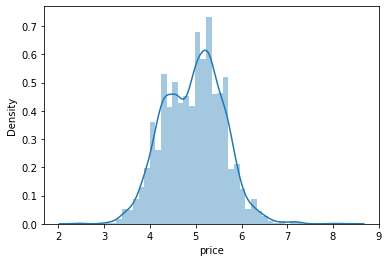

In [145]:
#Check the new distribution to make sure its transformed
sns.distplot(airbnb_df['price']);

In [146]:
#check missing data ratio
missing_2 = (airbnb_df.isnull().sum()/ len(airbnb_df)) * 100
missing_2 = missing_2.drop(missing_2[missing_2 ==0].index).sort_values(ascending=False)[:30]
missing_2

property_type    0.083682
dtype: float64

### check both numerical and categorical columns before further processing



In [147]:
numerical = airbnb_df.select_dtypes(exclude='object')
numerical.columns

Index(['host_response_rate', 'host_acceptance_rate', 'accomodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'extra_people', 'number_of_reviews',
       'review_scores_rating', 'wireless_internet', 'smoke_detector',
       'air_conditioning', 'heating', 'cable_tv', 'washer', 'dryer',
       'family_kid_friendly', 'kitchen', 'free_parking', 'carbon_monoxide',
       'pets_allowed', 'essentials', 'checkin_24hr', 'lock_on_bedroom_door',
       'pool', 'hair_dryer', 'gym', 'wheelchair_accessible', 'iron', 'shampoo',
       'hangers', 'first_aid_kit', 'elevator'],
      dtype='object')

In [148]:
categorical = airbnb_df.select_dtypes('object')
categorical.columns

Index(['street', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy'],
      dtype='object')

### check if other numerical features are normally distributed



In [153]:
from scipy.stats import skew 
skewness = numerical.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

security_deposit         5.910140
wheelchair_accessible    4.611511
pool                     4.410552
number_of_reviews        3.793430
extra_people             3.035458
beds                     3.019025
bathrooms                2.923290
lock_on_bedroom_door     2.171556
gym                      2.153732
pets_allowed             2.129171
accomodates              1.676401
bedrooms                 1.472663
cleaning_fee             1.391901
free_parking             1.254539
elevator                 1.204016
first_aid_kit            0.891079
checkin_24hr             0.638954
price                    0.053221
cable_tv                 0.025107
hair_dryer              -0.020643
iron                    -0.039617
family_kid_friendly     -0.106707
hangers                 -0.216033
shampoo                 -0.748792
carbon_monoxide         -0.777523
washer                  -0.823538
review_scores_rating    -1.174759
host_acceptance_rate    -1.199155
air_conditioning        -1.401155
smoke_detector

In [154]:
#normalize the data by taking log
skewness = np.log(skewness)
skewness.sort_values(ascending=False)

C:\Users\Raissa\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


security_deposit         1.776669
wheelchair_accessible    1.528556
pool                     1.484000
number_of_reviews        1.333270
extra_people             1.110362
beds                     1.104934
bathrooms                1.072710
lock_on_bedroom_door     0.775444
gym                      0.767202
pets_allowed             0.755733
accomodates              0.516649
bedrooms                 0.387072
cleaning_fee             0.330671
free_parking             0.226768
elevator                 0.185663
first_aid_kit           -0.115322
checkin_24hr            -0.447924
price                   -2.933311
cable_tv                -3.684625
host_response_rate            NaN
host_acceptance_rate          NaN
review_scores_rating          NaN
wireless_internet             NaN
smoke_detector                NaN
air_conditioning              NaN
heating                       NaN
washer                        NaN
dryer                         NaN
family_kid_friendly           NaN
kitchen       

C:\Users\Raissa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


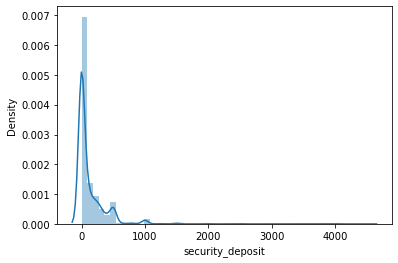

In [155]:
#check the distribution of security_deposit
sns.distplot(airbnb_df['security_deposit']);

C:\Users\Raissa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


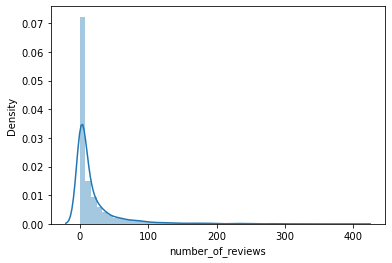

In [176]:
#check the distribution of number_of_reviews
sns.distplot(airbnb_df['number_of_reviews']);

C:\Users\Raissa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


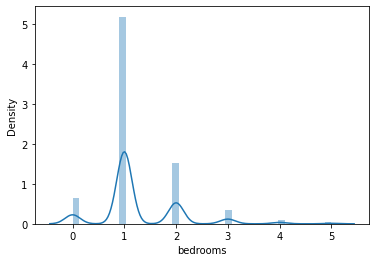

In [64]:
#check the distribution of bedrooms
sns.distplot(airbnb_df['bedrooms']);

### Process categorical features using Label Encoding



In [158]:
#transform text into numerical data by applying LabelEncoder 
from sklearn.preprocessing import LabelEncoder
cols = ('street', 'neighbourhood_cleansed', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy')

for col in cols:
  le = LabelEncoder()
  le.fit(list(airbnb_df[col].values))
  airbnb_df[col] = le.fit_transform(list(airbnb_df[col].values))
airbnb_df.shape

(3585, 42)

In [159]:
airbnb_df.head()

,host_response_rate,host_acceptance_rate,street,neighbourhood_cleansed,property_type,room_type,accomodates,bathrooms,bedrooms,beds,...,lock_on_bedroom_door,pool,hair_dryer,gym,wheelchair_accessible,iron,shampoo,hangers,first_aid_kit,elevator
0,100,100,280,17,4,0,1,1.0,1,2,...,0,0,0,0,0,0,0,0,0,0
1,100,100,523,12,8,0,4,1.0,2,3,...,0,0,0,0,0,0,1,0,0,0
2,92,100,348,20,8,1,2,1.0,1,1,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1107,22,0,1,1,1.0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,100,100,987,7,8,1,3,1.0,1,1,...,0,0,0,0,0,0,1,0,1,0


# **Step 4: Multiple Linear Regression Model: Predict house prices based on the selected features**

* Scale x and y
* Split the data into train and test (X:features, y=target)
* Create an instance of the model with model = LinearRegression().
* Train the model with the dataset with model.fit(X,y)
* Create predictions with y_pred = model.predict(X)

In [160]:
#Determine features and target
feature = airbnb_df.drop(columns=['price'])
target = airbnb_df['price']

print(feature)
print(target)

      host_response_rate  host_acceptance_rate  street  \
0                    100                   100     280   
1                    100                   100     523   
2                     92                   100     348   
3                      0                     0    1107   
4                    100                   100     987   
...                  ...                   ...     ...   
3580                   0                     0    1091   
3581                   0                     0     149   
3582                   0                     0      41   
3583                   0                     0     287   
3584                  89                    45     582   

      neighbourhood_cleansed  property_type  room_type  accomodates  \
0                         17              4          0            1   
1                         12              8          0            4   
2                         20              8          1            2   
3                  

# **Initial Features Selection**
we selected 5 features.

***NUmerical Category:***
Based on heatmap, pick the top 5 features that are most correlated to sales price(vmax>0.25). We also added another additional features: total_area

* accomodates
* bedrooms	
* beds
* cleaning_fee	
* bathrooms	


***Categorical Category:***
Categorical object can not be compared using heatmap so we selected a few more features based on commonsense
* comments
* host_picture_url
* bed_type
* room_type

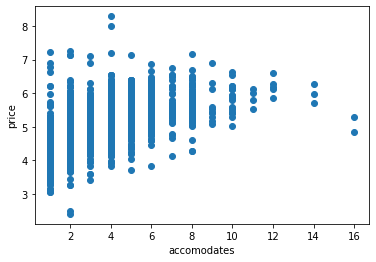

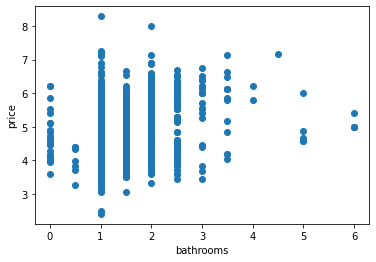

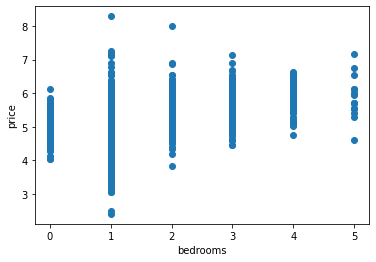

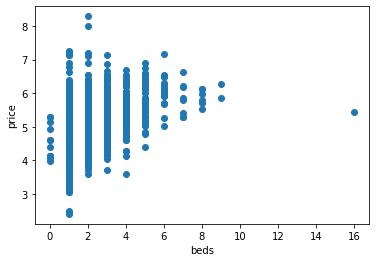

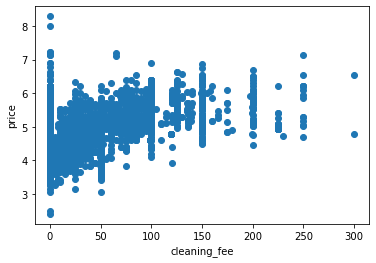

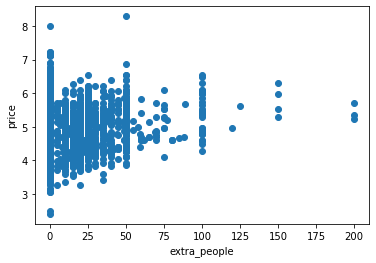

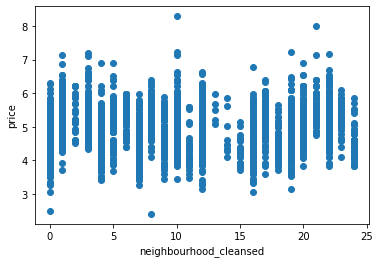

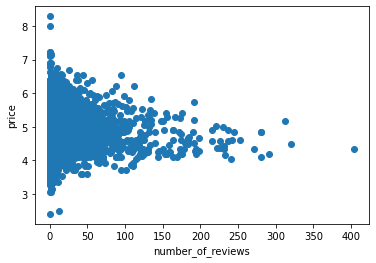

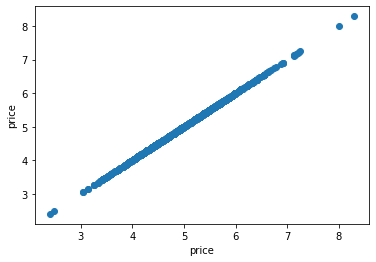

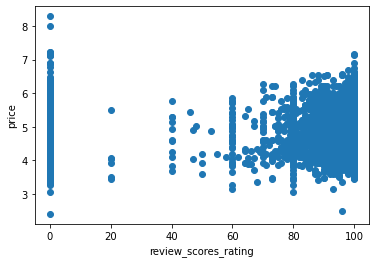

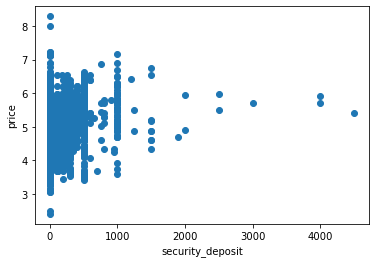

In [162]:
# 'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type', 'cancellation_policy'
x_features = ['accomodates', 'bathrooms', 'bedrooms', 'beds',
       'cleaning_fee',
       'extra_people', 'neighbourhood_cleansed', 
       'number_of_reviews', 'price',
       'review_scores_rating', 'security_deposit']
for x in x_features:

  plt.scatter(airbnb_df[x], airbnb_df['price'])
  plt.xlabel(x)
  plt.ylabel('price')
  plt.show()

In [163]:
#dropping any NA before putting the dataset into our model
airbnb_df = airbnb_df.dropna()
airbnb_df.isnull().sum()

host_response_rate        0
host_acceptance_rate      0
street                    0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accomodates               0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
price                     0
security_deposit          0
cleaning_fee              0
extra_people              0
number_of_reviews         0
review_scores_rating      0
cancellation_policy       0
wireless_internet         0
smoke_detector            0
air_conditioning          0
heating                   0
cable_tv                  0
washer                    0
dryer                     0
family_kid_friendly       0
kitchen                   0
free_parking              0
carbon_monoxide           0
pets_allowed              0
essentials                0
checkin_24hr              0
lock_on_bedroom_door      0
pool                      0
hair_dryer                0
gym                 

# Machine Learning Model

In [164]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score

In [165]:
airbnb_df.columns


Index(['host_response_rate', 'host_acceptance_rate', 'street',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accomodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'number_of_reviews',
       'review_scores_rating', 'cancellation_policy', 'wireless_internet',
       'smoke_detector', 'air_conditioning', 'heating', 'cable_tv', 'washer',
       'dryer', 'family_kid_friendly', 'kitchen', 'free_parking',
       'carbon_monoxide', 'pets_allowed', 'essentials', 'checkin_24hr',
       'lock_on_bedroom_door', 'pool', 'hair_dryer', 'gym',
       'wheelchair_accessible', 'iron', 'shampoo', 'hangers', 'first_aid_kit',
       'elevator'],
      dtype='object')

## Pick features and scale the data



In [167]:
#put our selected features into a list
cols = ['host_response_rate', 'host_acceptance_rate', 'street',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'accomodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'number_of_reviews',
       'review_scores_rating', 'cancellation_policy', 'wireless_internet',
       'smoke_detector', 'air_conditioning', 'heating', 'cable_tv', 'washer',
       'dryer', 'family_kid_friendly', 'kitchen', 'free_parking',
       'carbon_monoxide', 'pets_allowed', 'essentials', 'checkin_24hr',
       'lock_on_bedroom_door', 'pool', 'hair_dryer', 'gym',
       'wheelchair_accessible', 'iron', 'shampoo', 'hangers', 'first_aid_kit',
       'elevator']
#try using only the numerical category


#assign y to our target and x to our features 
y = airbnb_df['price'].values
X = airbnb_df[cols]

#try using all the columns as features

#scale the data
X_scaled = preprocessing.StandardScaler().fit_transform(X)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))

### Perform 80/20 data split



In [168]:
#data is split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state= 0)
#check the shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2868, 42), (717, 42), (2868, 1), (717, 1))

### Linear Regression Model



In [169]:
#define the model
model = linear_model.LinearRegression()
#build training model -->start time 
model.fit(X_train, y_train)
#-->end
#run prediction on test set 
y_test_pred = model.predict(X_test)


# print(y_test_pred.shape)

### Model Performance



In [170]:
#print the coefficient, intercept, MSE and model score(R^2)
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean squared Error(MSE): {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"Coefficient of Determination(R^2): {r2_score(y_test, y_test_pred):.2f}")

Coefficients: [[ 7.33512591e-16 -5.26678160e-16 -1.99104764e-16  4.04949383e-16
   6.42925596e-17  1.67990451e-15 -7.85493800e-16 -2.82872515e-16
   7.13131917e-16 -4.15480771e-16  1.49077523e-16  1.00000000e+00
  -9.74103832e-17  1.86004433e-16  7.74292303e-17  9.59084352e-17
   4.06576193e-16 -1.07203881e-16  4.25094811e-16  8.56983139e-18
  -2.98404933e-16  5.93007373e-16 -4.28957095e-16  2.95537227e-16
  -1.70395629e-16 -5.50679017e-17  5.40866797e-16  1.95380156e-16
   2.94131266e-16  1.75683744e-16  5.54853073e-17 -3.59449616e-16
  -6.29054738e-17  1.31321165e-16 -5.13139709e-16 -5.48483977e-16
  -1.57399217e-16  8.60640733e-16  7.09145129e-17 -8.24865581e-16
  -1.86512716e-17  9.76393715e-17]]
Intercept: [-1.03216047e-16]
Mean squared Error(MSE): 0.00
Coefficient of Determination(R^2): 1.00


### Make a scatter plot



In [171]:
from sklearn.ensemble import GradientBoostingRegressor
gboostRegressorModel = GradientBoostingRegressor(n_estimators=2500, random_state =0)
gboostRegressorModel.fit(X_train,y_train)
gboost_trainscore=gboostRegressorModel.score(X_train, y_train)
print("Training Accuracy of GradientBoosting Regression:",gboost_trainscore)

# Predict new result
y_pred_gbr = gboostRegressorModel.predict(X_test)

gboost_testscore=gboostRegressorModel.score(X_test, y_test)
print("Testing Accuracy of GradientBoosting Regression:",gboost_testscore)

C:\Users\Raissa\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training Accuracy of GradientBoosting Regression: 0.9999998428118738
Testing Accuracy of GradientBoosting Regression: 0.9996877452487068


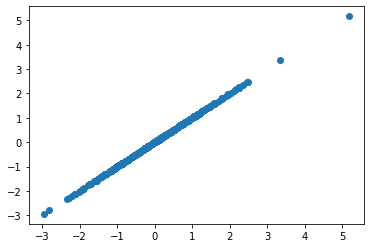

In [172]:
plt.scatter(y_test, y_test_pred)
plt.show()

In [173]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))
nn_model.summary()
nn_model.compile(loss="mean_squared_error", optimizer="adam")
#start--neural
nn_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)
#end
y_train_pred = nn_model.predict(X_train_scaled)
y_test_pred = nn_model.predict(X_test_scaled)

deep_model = tf.keras.models.Sequential()
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu"))
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))
deep_model.summary()

deep_model.compile(loss="mean_squared_error", optimizer="adam")
#start--deep
deep_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)
#end
y_train_pred = deep_model.predict(X_train_scaled)
y_test_pred = deep_model.predict(X_test_scaled)

#1st model + time VS 2nd model + time

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 84)                3612      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 85        
Total params: 3,697
Trainable params: 3,697
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
90/90 [==============================] - 0s 1ms/step - loss: 0.6064
Epoch 2/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3730
Epoch 3/100
90/90 [==============================] - 0s 1ms/step - loss: 0.3111
Epoch 4/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2745
Epoch 5/100
90/90 [==============================] - 0s 1ms/step - loss: 0.2380
Epoch 6/100
90/90 [==============================] - 0s 2ms/step - loss: 0.2036A: 0s - loss: 0.19
Epoch 7/100
90/9

90/90 [==============================] - 0s 999us/step - loss: 2.7683e-04
Epoch 92/100
90/90 [==============================] - 0s 998us/step - loss: 7.2627e-04
Epoch 93/100
90/90 [==============================] - 0s 997us/step - loss: 1.1770e-04
Epoch 94/100
90/90 [==============================] - 0s 941us/step - loss: 1.3824e-04
Epoch 95/100
90/90 [==============================] - 0s 1ms/step - loss: 1.2498e-04
Epoch 96/100
90/90 [==============================] - 0s 1ms/step - loss: 1.3599e-04
Epoch 97/100
90/90 [==============================] - 0s 997us/step - loss: 7.0719e-05
Epoch 98/100
90/90 [==============================] - 0s 1ms/step - loss: 3.2346e-04
Epoch 99/100
90/90 [==============================] - 0s 1ms/step - loss: 1.3715e-04
Epoch 100/100
90/90 [==============================] - 0s 1ms/step - loss: 8.2991e-05
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #  

In [174]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.9993595485152619
0.997381389980381


# Models Comparison - R^2

### Multiple Linear Regression

* 42 features--> 1.00
* 10 features--> 0.87
* 8 features--> 0.61
